In [ ]:
#Montar google drive en colab
from google.colab import drive
drive.mount('/content/drive')

#Leer datos de base de datos
import pandas as pd
import numpy as np
# Visualización y gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#Creacion del data frame
df = pd.read_excel("/content/drive/MyDrive/Almacenamiento de datos/Datos_Cultivo.xlsx", header = 0)

Mounted at /content/drive


Fuente de los datos
Los datos que se estudiaron se obtivieron de los registros realizados a un cultivo de pimenton que se sometio a 4 tratamientos de fertilizacion.

el objetivo es determinar la fertilizacion mas productiva para el cultivo de pimenton.

Contexto y obtencion de los datos
El experimiento se desarrollo en el SENA-Centro Agropecuario de Buga, como una actividad de formacion entre aprendices e instructores en el area de agropecuaria.

Se plantaron 1.440 semillas de pimenton en 12 bandejas de germinacion de 10x12.

Estructura de los datos
Los datos se estructuran en una tabla construida a partir de formularios de seguimiento que se le hicieron al cultivo en 3 etapas:

1. Germinacion: En esta etapa se mide con variable binaria si la semilla germina, 1 para germina y 0 para no germina.
2. Crecimiento: En esta fase se revisa la creacion de biomasa en gramos de la planta en la raiz y el tallo, para conocer la potencialidad de crecimiento.
3. Cosecha: Se hace seguimiento con medidas de peso y volumen del fruto para valorar la produccion de la planta.

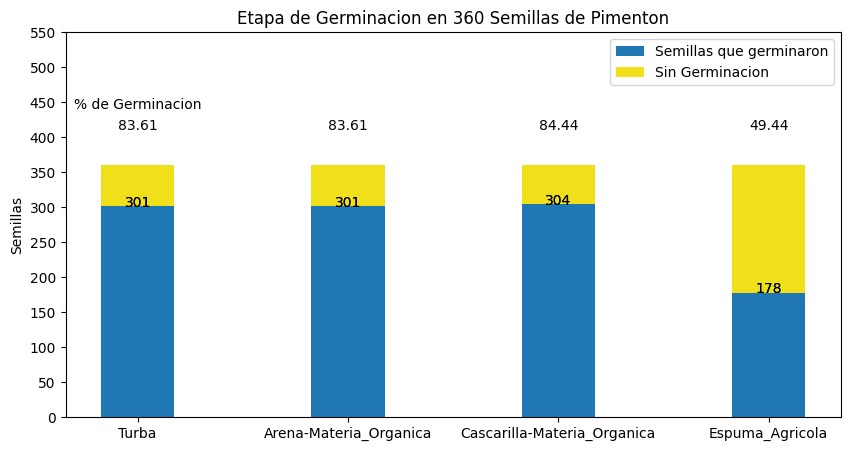

In [ ]:
germ = df.loc[:,["Tratamiento", "Germinacion"]]

t = germ["Tratamiento"].unique()

#sobrevivientes = (df["Survived"]==1).sum() #Cuento los pasajeros que sobrevivieron (1)
#murieron = (df["Survived"]==0).sum()

t1 = germ.loc[germ['Tratamiento'] == t[0]]
g1 = (t1['Germinacion']==1).sum()
ng1 = (t1['Germinacion']==0).sum()

t2 = germ.loc[germ['Tratamiento'] == t[1]]
g2 = (t2['Germinacion']==1).sum()
ng2 = (t2['Germinacion']==0).sum()

t3 = germ.loc[germ['Tratamiento'] == t[2]]
g3 = (t3['Germinacion']==1).sum()
ng3 = (t3['Germinacion']==0).sum()

t4 = germ.loc[germ['Tratamiento'] == t[3]]
g4 = (t4['Germinacion']==1).sum()
ng4 = (t4['Germinacion']==0).sum()

n=4
ind = np.arange(n)
width = 0.35

def add_value_label(x_list,y_list):
    plt.annotate(y_list[0],(0,y_list[0]),ha="center")
    for i in range(1, len(x_list)):
        plt.annotate(y_list[i],(i,y_list[i]),ha="center")

g = (g1, g2, g3, g4)
ng = (ng1, ng2, ng3, ng4)

plt.subplots(figsize =(10, 5)) # Modificar el tamaño del grafico
p1 = plt.bar(ind, g, width)
add_value_label(ind,g)
add_value_label(ind,g)
p2 = plt.bar(ind, ng, width, color = "#EFE019",
             bottom = g)

plt.annotate(round(g1/(g1+ng1),4)*100,(0,410),ha="center")
plt.annotate(round(g2/(g2+ng2),4)*100,(1,410),ha="center")
plt.annotate(round(g3/(g3+ng3),4)*100,(2,410),ha="center")
plt.annotate(round(g4/(g4+ng4),4)*100,(3,410),ha="center")
plt.annotate("% de Germinacion",(0,440),ha="center")

plt.ylabel('Semillas')
plt.title('Etapa de Germinacion en 360 Semillas de Pimenton')
plt.xticks(ind, t)
plt.yticks(np.arange(0, 600, 50))
plt.legend((p1[0], p2[0]), ('Semillas que germinaron', 'Sin Germinacion'))

plt.show()

Analisis fase 1
Para este analisis se extrajo la informacion solo de la 2da columna, realizamos los conteos de las semillas que no germinaron y con las proporciones se determino el 1er indicador del experimento, para obtener el porcetaje de germinacion de cada tramiento. en este grafico, se puede observar porque se desecho seguir haciendo pruebas con la espuma agricola, ya que casi la mitad de las semillas no germinaron.



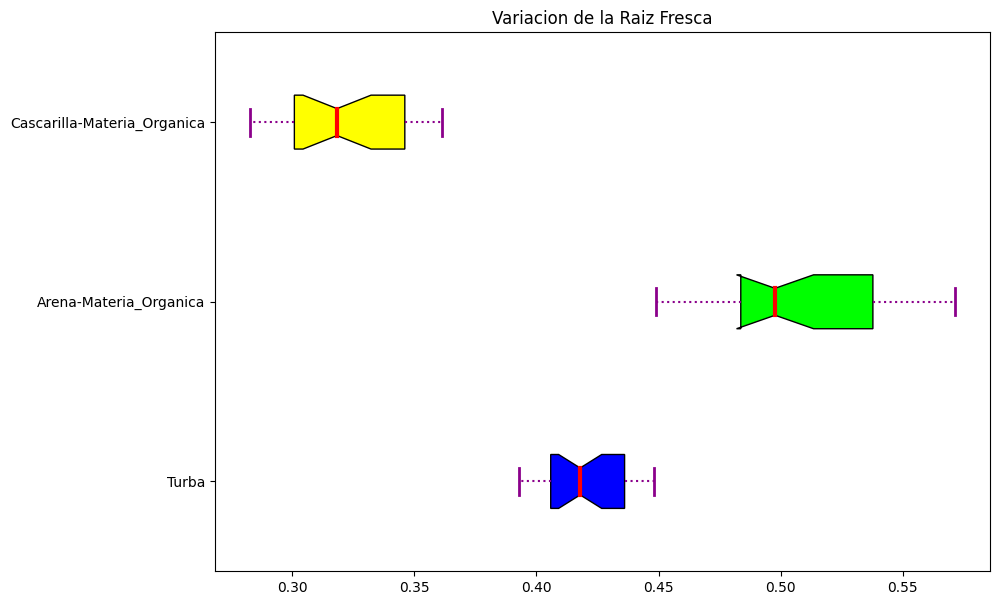

In [ ]:
mfr = df.loc[:,["Tratamiento", "Materia_Fresca_Raiz"]]

mfr[mfr == 0] = np.NAN
mfr = mfr.dropna(subset=["Materia_Fresca_Raiz"])
tur = mfr.loc[mfr['Tratamiento'] == "Turba", 'Materia_Fresca_Raiz']
are = mfr.loc[mfr['Tratamiento'] == "Arena-Materia_Organica", 'Materia_Fresca_Raiz']
cas = mfr.loc[mfr['Tratamiento'] == "Cascarilla-Materia_Organica", 'Materia_Fresca_Raiz']
t = mfr["Tratamiento"].unique()
mfr2 = [tur, are, cas]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(mfr2, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(t)

# Adding title
plt.title("Variacion de la Raiz Fresca")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

Analisis fase 2
Se extrajo de los datos la 3ra columna y luego se descartaron los datos con 0 de la fase de germinacion, para conocer la variacion del peso de la raiz de la plantula. En esta grafica de cajas se facil observar cuales son las diferencias en los tratamientos, segun las indicaciones del experto, es mejor si el peso en gramos es mayor, y en este caso la Arena resulta ser el mejor tratamiento, seguida por la turba.

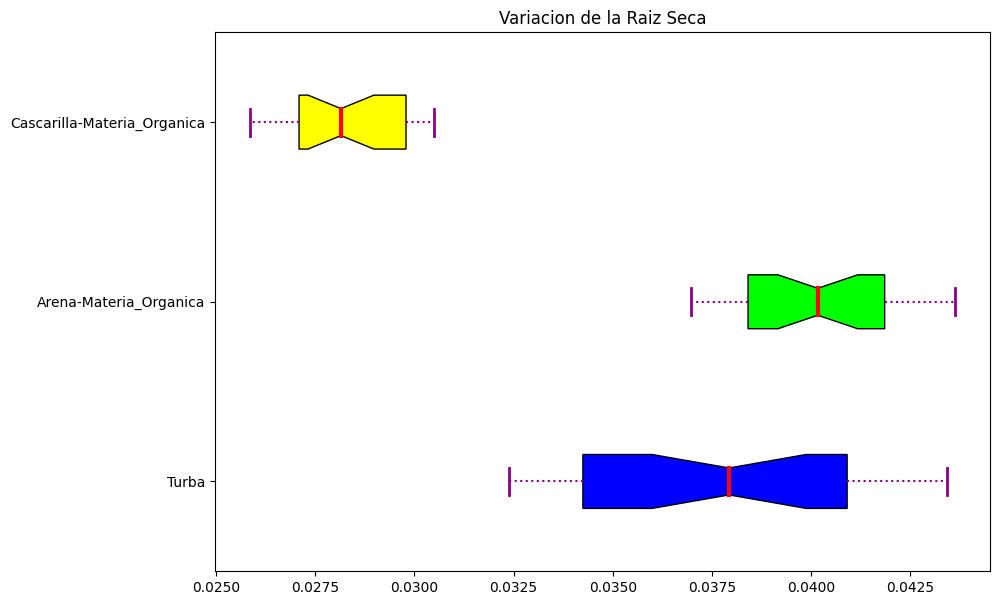

In [ ]:
mfr = df.loc[:,["Tratamiento", "Materia_Seca_Raiz"]]

mfr[mfr == 0] = np.NAN
mfr = mfr.dropna(subset=["Materia_Seca_Raiz"])
tur = mfr.loc[mfr['Tratamiento'] == "Turba", 'Materia_Seca_Raiz']
are = mfr.loc[mfr['Tratamiento'] == "Arena-Materia_Organica", 'Materia_Seca_Raiz']
cas = mfr.loc[mfr['Tratamiento'] == "Cascarilla-Materia_Organica", 'Materia_Seca_Raiz']
t = mfr["Tratamiento"].unique()
mfr2 = [tur, are, cas]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(mfr2, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(t)

# Adding title
plt.title("Variacion de la Raiz Seca")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

Analisis fase 2
En este grafico se tomaron las mediciones de la columna 4, donde se registra el peso de la raiz sin agua, donde se puede observar que la turba y la arena se vuelven muy parecidas. segun el experto, el peso de la raiz es un indicador que muestra la capacidad que tiene la planta para absorver nutrientes y agua, que pueden reflejarse en sus frutos.

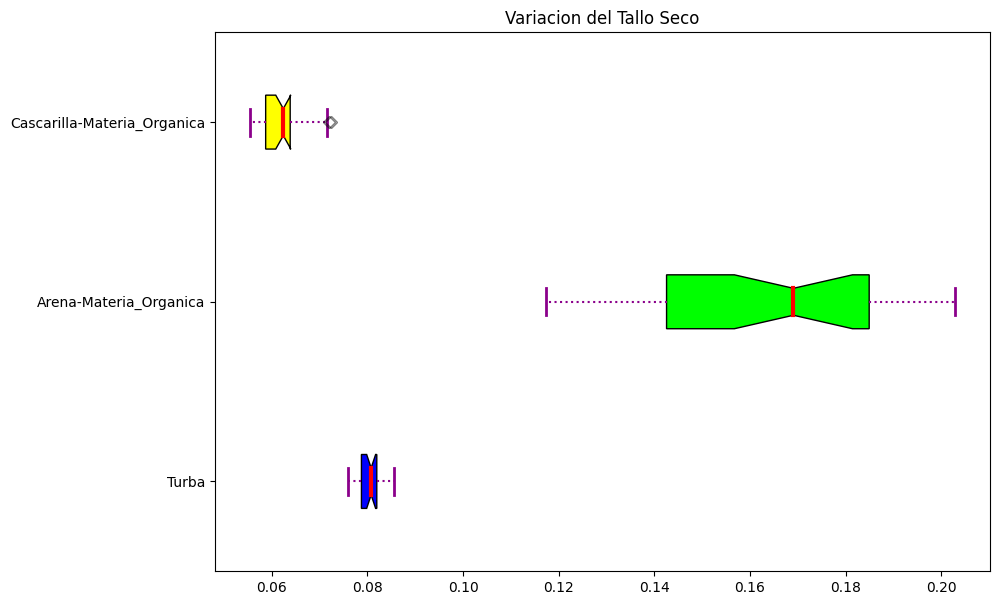

In [ ]:
mfr = df.loc[:,["Tratamiento", "Materia_Seca_Tallo"]]

mfr[mfr == 0] = np.NAN
mfr = mfr.dropna(subset=["Materia_Seca_Tallo"])
tur = mfr.loc[mfr['Tratamiento'] == "Turba", 'Materia_Seca_Tallo']
are = mfr.loc[mfr['Tratamiento'] == "Arena-Materia_Organica", 'Materia_Seca_Tallo']
cas = mfr.loc[mfr['Tratamiento'] == "Cascarilla-Materia_Organica", 'Materia_Seca_Tallo']
t = mfr["Tratamiento"].unique()
mfr2 = [tur, are, cas]

fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(mfr2, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(t)

# Adding title
plt.title("Variacion del Tallo Seco")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

Analisis fase 2
En este grafico de cajas se observa como la fertilizacion con arena sigue siendo la mejor tendencia en cuanto produccion de peso en el tallo. como no hay traslape entre las cajas es facil observar que los 3 tratamientos son diferentes para generar biomasa en el tallo. la cascarilla de arroz sigue siendo la que menos peso produce, como sucedio con la raiz.

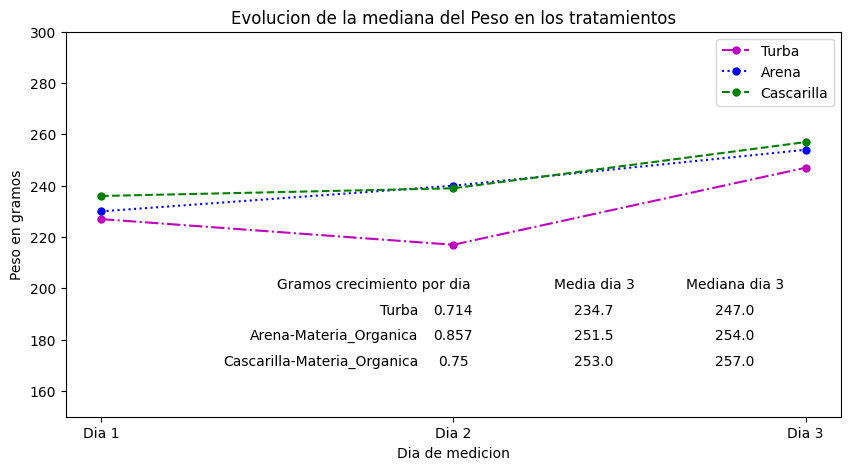

In [ ]:
pesos = df.loc[:,["Tratamiento",  'Peso_Dia1', 'Peso_Dia2', 'Peso_Dia3']]
pesos[pesos == 0] = np.NAN
pesos = pesos.dropna(subset=["Peso_Dia1"])

tur = pesos.loc[pesos['Tratamiento'] == "Turba"]
are = pesos.loc[pesos['Tratamiento'] == "Arena-Materia_Organica"]
cas = pesos.loc[pesos['Tratamiento'] == "Cascarilla-Materia_Organica"]

mtur1 = (tur['Peso_Dia1']).median()
mtur2 = (tur['Peso_Dia2']).median()
mtur3 = (tur['Peso_Dia3']).median()
mutur3 = (tur['Peso_Dia3']).mean()

mare1 = (are['Peso_Dia1']).median()
mare2 = (are['Peso_Dia2']).median()
mare3 = (are['Peso_Dia3']).median()
muare3 = (are['Peso_Dia3']).mean()


mcas1 = (cas['Peso_Dia1']).median()
mcas2 = (cas['Peso_Dia2']).median()
mcas3 = (cas['Peso_Dia3']).median()
mucas3 = (cas['Peso_Dia3']).mean()

D = ["Dia 1","Dia 2","Dia 3"]

mtur = [mtur1, mtur2, mtur3]
mare = [mare1, mare2, mare3]
mcas = [mcas1, mcas2, mcas3]

plt.subplots(figsize =(10, 5))
plt.xlabel("Dia de medicion")
plt.ylabel("Peso en gramos")
plt.title("Evolucion de la mediana del Peso en los tratamientos")
plt.ylim(150,300)
t1=plt.plot(D,mtur,'m-.', marker = 'o',
         markerfacecolor = 'm', markersize = 5)
t2=plt.plot(D,mare, 'b:', marker = 'o',
         markerfacecolor = 'b', markersize = 5)
t3=plt.plot(D,mcas, 'g--', marker = 'o',
         markerfacecolor = 'g', markersize = 5)
plt.legend((t1[0], t2[0], t3[0]), ('Turba', 'Arena', "Cascarilla"))

plt.annotate(t[0],(0.9,190),ha="right")
plt.annotate(t[1],(0.9,180),ha="right")
plt.annotate(t[2],(0.9,170),ha="right")
plt.annotate(round((mtur3-mtur1)/28,3),(1,190),ha="center")
plt.annotate(round((mare3-mare1)/28,3),(1,180),ha="center")
plt.annotate(round((mcas3-mcas1)/28,3),(1,170),ha="center")
plt.annotate(round(mtur3,3),(1.8,190),ha="center")
plt.annotate(round(mare3,3),(1.8,180),ha="center")
plt.annotate(round(mcas3,3),(1.8,170),ha="center")
plt.annotate(round(mutur3,1),(1.4,190),ha="center")
plt.annotate(round(muare3,1),(1.4,180),ha="center")
plt.annotate(round(mucas3,1),(1.4,170),ha="center")
plt.annotate("Gramos crecimiento por dia",(1.05,200),ha="right")
plt.annotate("Mediana dia 3",(1.8,200),ha="center")
plt.annotate("Media dia 3",(1.4,200),ha="center")
plt.show()

Analisis fase 3
Para este analisis se realizaron 3 mediciones de peso cada 10 dias, en este orden , se hizo la 1ra medida en el dia 10, otra en dia 20 y la ultima en el dia 30. previamenta se tuvo que limpiar los datos de los pesos cero que generaron las plantulas sacrificadas en la fase 2 para medir la raiz y el tallo. en el grafico se puede observar la evolucion de los 3 tratamientos y fue posible calcular un indicador de gramos de crecimiento por dia. de esta manera, el grafico nos muestra que la cascarilla de arroz termina generando los frutos mas pesados, seguido por la arena. sin embargo, el indicador de crecimiento registra que la arena puede lograr mas gramos por dia de fruta.

In [ ]:
from _plotly_utils.basevalidators import TitleValidator
import plotly.express as px

pesos = df.loc[:,["Tratamiento", 'Peso_Dia3']]
pesos[pesos == 0] = np.NAN
d3 = pesos.dropna(subset=["Peso_Dia3"])

pesos = df.loc[:,["Tratamiento",  'Peso_Dia1', 'Peso_Dia2', 'Peso_Dia3']]
pesos[pesos == 0] = np.NAN
pesos = pesos.dropna(subset=["Peso_Dia1"])

tur = pesos.loc[pesos['Tratamiento'] == "Turba"]
are = pesos.loc[pesos['Tratamiento'] == "Arena-Materia_Organica"]
cas = pesos.loc[pesos['Tratamiento'] == "Cascarilla-Materia_Organica"]

mtur3 = (tur['Peso_Dia3'])
mare3 = (are['Peso_Dia3'])
mcas3 = (cas['Peso_Dia3'])

from scipy.stats import f_oneway

annova = f_oneway(mtur3, mare3, mcas3)

fig = px.violin(d3, y = 'Peso_Dia3', color = 'Tratamiento', box = True,
                color_discrete_map = {"Turba": '#66C2A5', "Arena-Materia_Organica": '#FC8D62', "Cascarilla-Materia_Organica": '#8DA0CB'}, title = "Variabilidad del peso del pimenton en el dia 3")
print("Annova de los tratamientos")
print(annova)

import scipy.stats as st

# Calcula los intervalos de confianza a un 95% para ambas variables
ictur = st.t.interval(confidence=0.95, df=len(mtur3)-1, loc=np.mean(mtur3), scale=st.sem((mtur3)))
icare = st.t.interval(confidence=0.95, df=len(mare3)-1, loc=np.mean(mare3), scale=st.sem(mare3))
iccas = st.t.interval(confidence=0.95, df=len(mcas3)-1, loc=np.mean(mcas3), scale=st.sem(mcas3))
print("Turba")
print(ictur)
print("Arena")
print(icare)
print("Cascarilla")
print(iccas)
fig.show()


Annova de los tratamientos
F_onewayResult(statistic=9.741259773203948, pvalue=6.591123570022002e-05)
Turba
(227.1931787768737, 242.1597623995969)
Arena
(247.1725029245298, 255.87161472252905)
Cascarilla
(246.08398727303552, 260.0023436622163)


Analisis fase 3
El diagrama de violinis arriba nos muestran 3 perspectivas de los datos de la cosecha que debemos tener en cuenta:

1. las curvas hacia los extremos de cada tratamiento nos indica la distribucion de los datos y muestra que no hay distribuciones totalmente normales y que los tratmientos de arena y cascarilla tienen 2 concentracion uno en la media y otra por debajo del 1er cuartil. la turba tambien tiene 2 acumulaciones en el 1er y 3er cuartil. de esta forma, podemos concluir que los tratmientos de arena y cascarilla tienen cierta similitud en su variacion.

2. las cajas de los tratmientos se encuentran posicionadas en una misma tendencia de peso lo que nos dificulta determinar graficamente si existen diferencias entre los tratamientos. por esta razon, acudimos a una prueba ANNOVA que nos indica que con una significancia del 95% podemos rechazar la hipoteses de que los tratamientos dan frutos de igual peso y que estos si son diferentes de acuerdo al tratamiento que se aplique. con los intervalos de confianza calculados podemos determinar que la turba se aleja de los otros 2 tratamientos.

3. Segun lo que muestran los datos la fertilizacion con arena brinda una produccion mas controlable y predicible, que son atributos de produccion que se deben tener en cuenta. la cascarilla de arroz genera los furtos con la media de peso mas grandes y muestra un dato atipico interesante con un fruto que alacanzo a pesar los 426 gramos cuando la mediana entre los 2 tratamientos esta entre 254 y 257.

En conclucion la planta si mejora su productividad si se somete a un tratamiento de fertilizacion y aunque la cascarillad de arroz genere los frutos mas grandes por su variacion no es muy conveniente para presupuestar una produccion, somo si lo es el tratamiento con arena que genera pesos de fruta mas entandarizados, controlables y predecibles para una produccion de pimenton.